In [1]:
import os
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.metrics import structural_similarity as ssim
from skimage.feature import hog

In [2]:
path_dataset = '/home/hyunjoon/dataset/got-10k/val/GOT-10k_Val_000001/'
list_fn = [l for l in os.listdir(path_dataset) if l.endswith('.jpg')]
list_fn = np.sort(list_fn)

In [3]:
all_imgs = [cv2.imread(os.path.join(path_dataset, fn)) for fn in list_fn]

In [4]:
resized_imgs = [cv2.resize(img, (80, 45)) for img in all_imgs]

In [5]:
def color_feature(img):
    if img.dtype == 'uint8':
        img = img.astype(float) / 255.0
    else:
        img = img.astype(float)
    r_img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA)
    r2 = cv2.resize(img**2, (8, 8), interpolation=cv2.INTER_AREA)
    r2 -= r_img**2
    r2 = np.sqrt(np.maximum(r2, 0))
    r_img = np.concatenate([r_img, 1.0 - r_img, r2, 1.0 - r2], axis=2).ravel()
    r_img = r_img / np.sqrt(np.sum(r_img**2))
    return r_img

In [9]:
all_clr = np.array([color_feature(img) for img in all_imgs])

In [14]:
p_clr = all_clr[10]
len(p_clr)

768

In [15]:
clrsim_all = np.sum(all_clr * np.reshape(p_clr, (1, -1)), axis=1)**100

In [16]:
mssim_all = [ssim(p_img, img, win_size=15, multichannel=True) for img in resized_imgs]

NameError: name 'p_img' is not defined

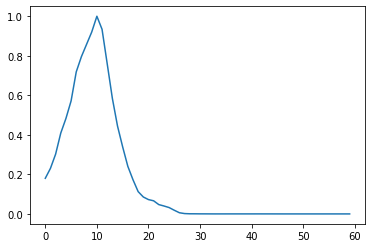

In [17]:
plt.plot(clrsim_all)

In [18]:
clrsim_all

array([1.80192844e-01, 2.30514349e-01, 3.02283633e-01, 4.08960352e-01,
       4.82794049e-01, 5.71555911e-01, 7.18546928e-01, 7.95604054e-01,
       8.57811553e-01, 9.20114037e-01, 1.00000000e+00, 9.34126590e-01,
       7.59993068e-01, 5.84756770e-01, 4.44535813e-01, 3.38875898e-01,
       2.40682133e-01, 1.72885276e-01, 1.12798855e-01, 8.56470711e-02,
       7.24694403e-02, 6.63608123e-02, 4.71831891e-02, 4.01430173e-02,
       3.21777715e-02, 1.85635566e-02, 5.91657727e-03, 1.74858059e-03,
       6.87322634e-04, 5.91623018e-04, 3.02490031e-04, 2.73580441e-04,
       1.38348520e-04, 5.51108501e-05, 7.69263816e-05, 9.86448059e-05,
       1.27372701e-04, 1.41447402e-04, 1.20991222e-04, 1.10603731e-04,
       1.18525890e-04, 1.48562198e-04, 1.30360547e-04, 1.14787278e-04,
       9.32193843e-05, 5.61839365e-05, 2.44294825e-05, 1.04112617e-05,
       5.71813723e-06, 4.45991081e-06, 3.93595829e-06, 4.02288492e-06,
       4.43327306e-06, 4.98151618e-06, 5.47331935e-06, 5.93143427e-06,
      

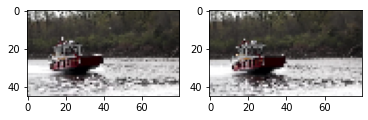

In [47]:
plt.subplot(1, 2, 1)
plt.imshow(resized_imgs[0][:, :, ::-1])
plt.subplot(1, 2, 2)
plt.imshow(resized_imgs[1][:, :, ::-1])

In [60]:
all_hogs = [hog(img, pixels_per_cell=(2, 2), multichannel=True) for img in resized_imgs]

In [64]:
p_hog = all_hogs[0]
sims_hog = [np.sum(p_hog * h) / 760 for h in all_hogs]
sims_hog[0]

0.9999999997869548

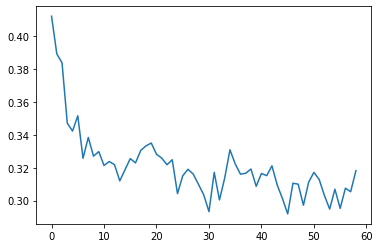

In [65]:
plt.plot(sims_hog[1:])

In [66]:
sims_hog

[0.9999999997869548,
 0.41203834026922503,
 0.3892006207929594,
 0.38370081507308146,
 0.3470348762470901,
 0.34225947417086205,
 0.3515284029251568,
 0.3257035264622354,
 0.33838088401272265,
 0.3270040639958781,
 0.3297742325237462,
 0.3213473205530685,
 0.3237452374045776,
 0.3218125398134143,
 0.3119762417375683,
 0.3187623143664894,
 0.32550709620108215,
 0.322924096012956,
 0.3305045271554237,
 0.33324863789593223,
 0.33498611737525114,
 0.3281892541218616,
 0.3257773755017221,
 0.3217943732421456,
 0.32481359606393534,
 0.3042438115230119,
 0.31507097202488804,
 0.3190321124857768,
 0.31610796278956155,
 0.3098774101251716,
 0.303485222706966,
 0.293290566575893,
 0.317146630769702,
 0.3003986872115549,
 0.3137632834998444,
 0.3308865803188278,
 0.3223079432703141,
 0.31605011471755456,
 0.31661714340148694,
 0.319184973346521,
 0.3086872029875154,
 0.3164733360840284,
 0.31516524826886055,
 0.32111931034841357,
 0.30951626473437677,
 0.30124935916598605,
 0.2919035514500911,
 0